In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib
import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 5)

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


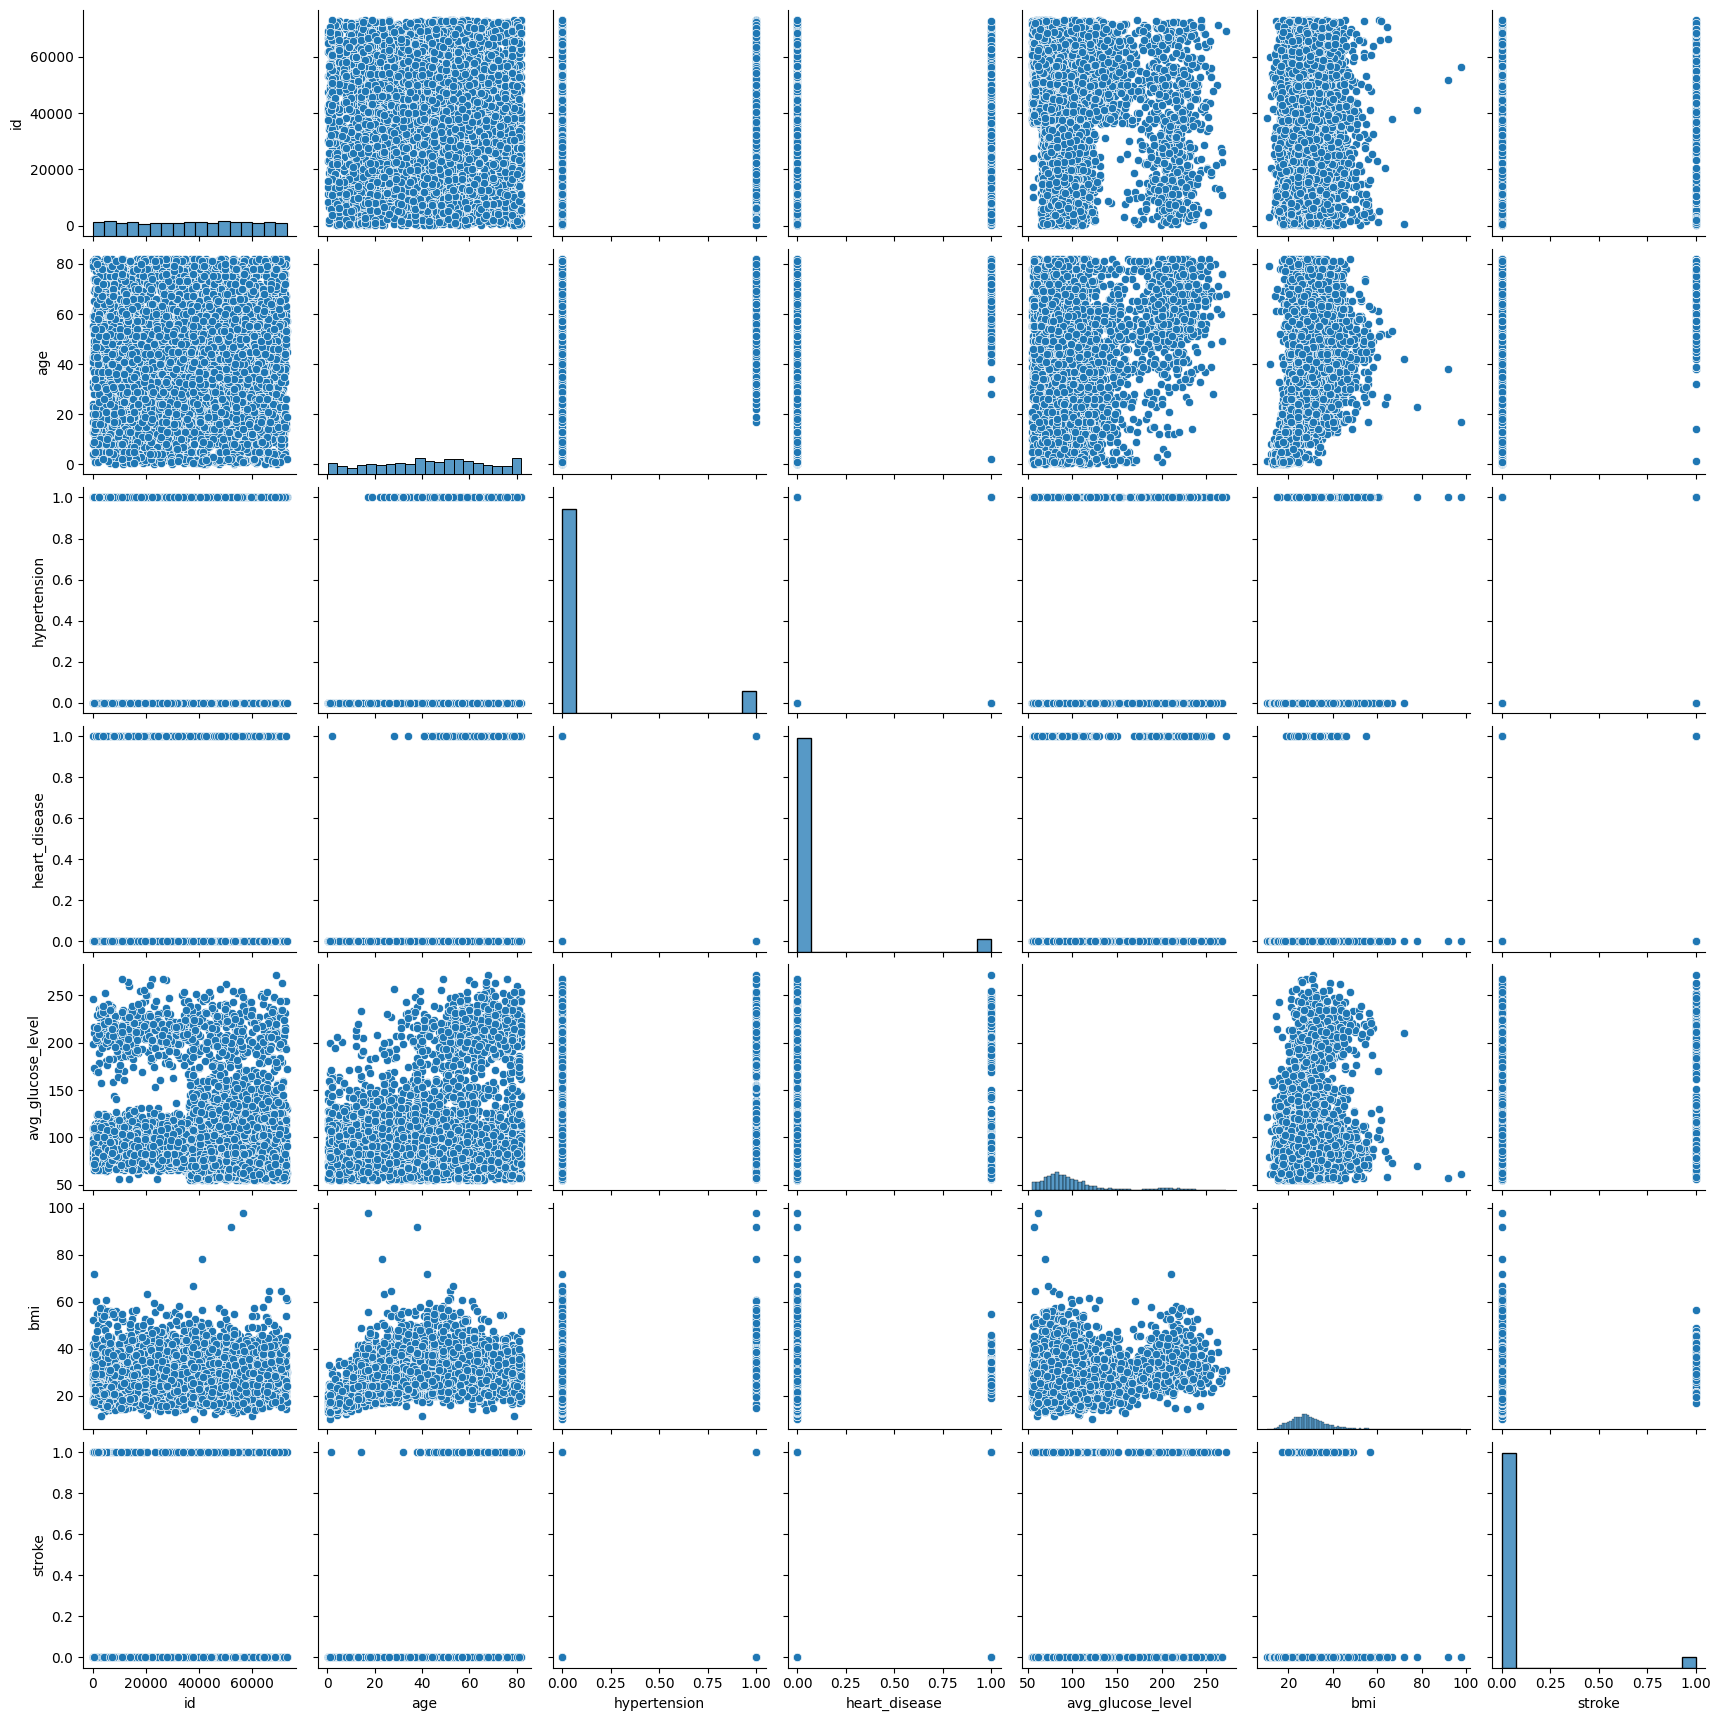

In [ ]:
sns.pairplot(data)

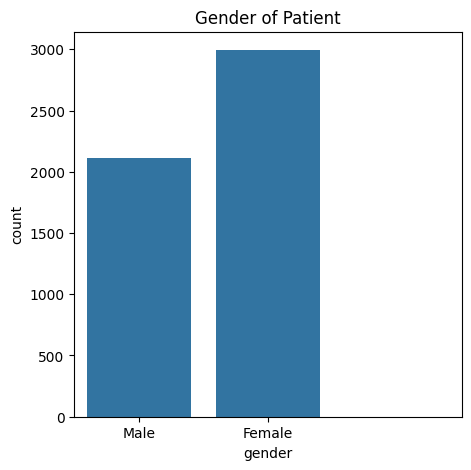

In [ ]:
sns.countplot(x='gender',data=data)
plt.xticks([0,1],['Male','Female'])
plt.title("Gender of Patient")
plt.show()

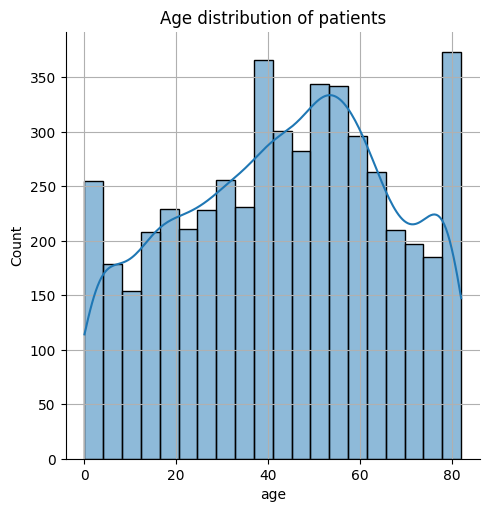

In [ ]:
sns.displot(x='age',kde=True,data=data)
plt.title("Age distribution of patients")
plt.grid(True)
plt.show()


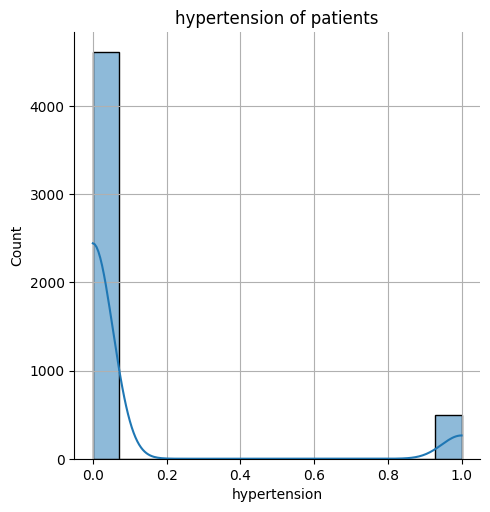

In [ ]:
sns.displot(x='hypertension',kde=True,data=data)
plt.title("hypertension of patients")
plt.grid(True)
plt.show()


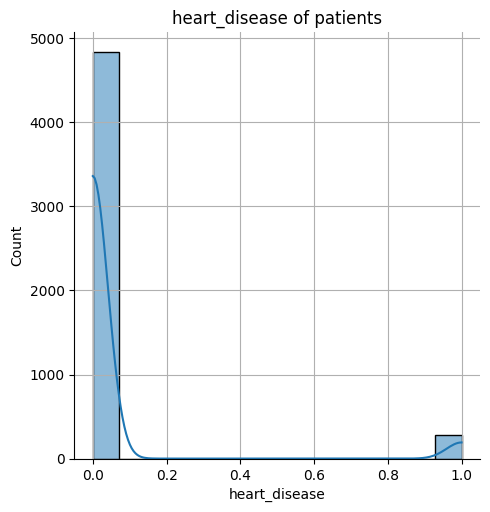

In [ ]:
sns.displot(x='heart_disease',kde=True,data=data)
plt.title("heart_disease of patients")
plt.grid(True)
plt.show()


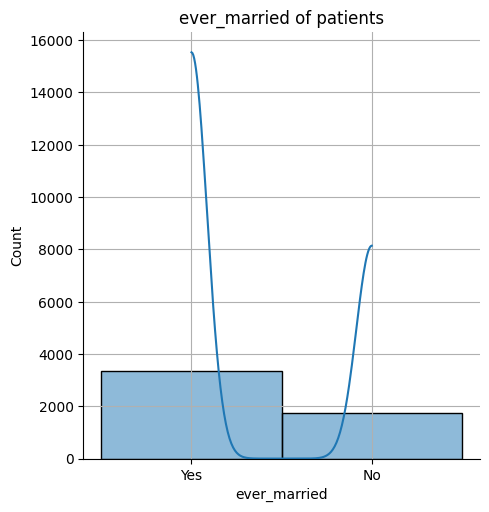

In [ ]:
sns.displot(x='ever_married',kde=True,data=data)
plt.title("ever_married of patients")
plt.grid(True)
plt.show()


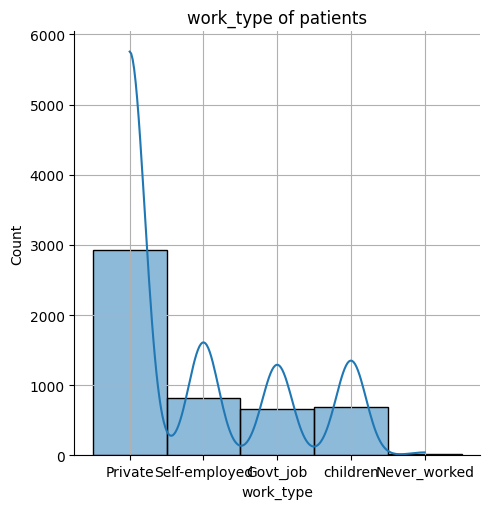

In [ ]:
sns.displot(x='work_type',kde=True,data=data)
plt.title("work_type of patients")
plt.grid(True)
plt.show()


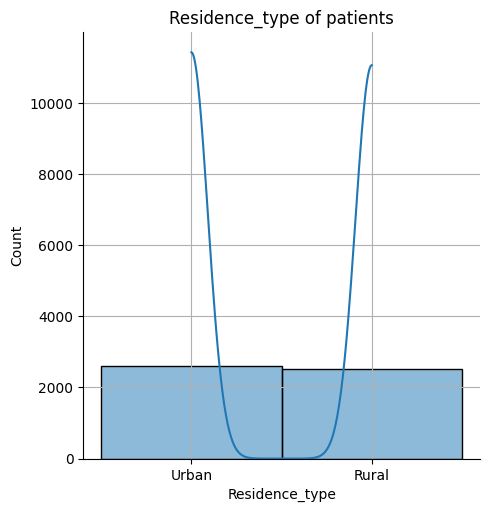

In [ ]:
sns.displot(x='Residence_type',kde=True,data=data)
plt.title("Residence_type of patients")
plt.grid(True)
plt.show()


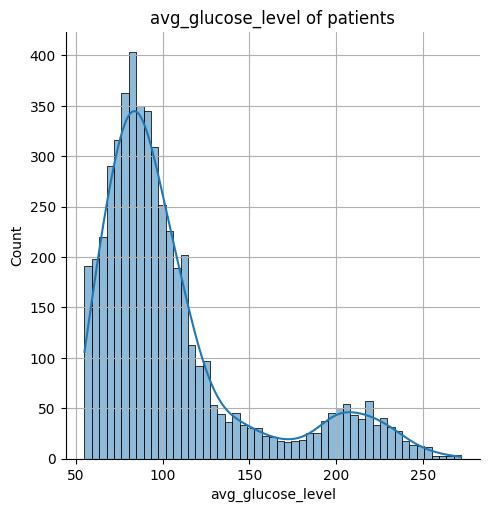

In [ ]:
sns.displot(x='avg_glucose_level',kde=True,data=data)
plt.title("avg_glucose_level of patients")
plt.grid(True)
plt.show()


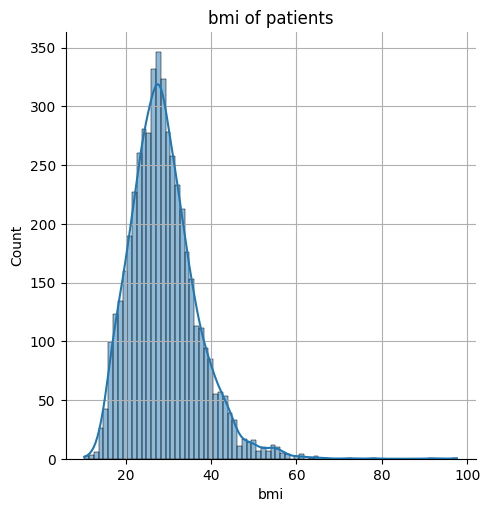

In [ ]:
sns.displot(x='bmi',kde=True,data=data)
plt.title("bmi of patients")
plt.grid(True)
plt.show()


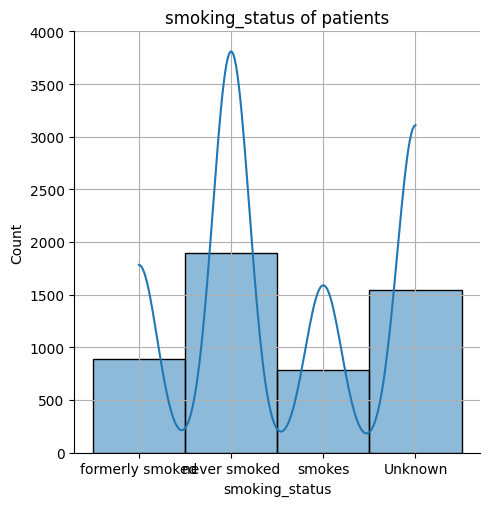

In [ ]:
sns.displot(x='smoking_status',kde=True,data=data)
plt.title("smoking_status of patients")
plt.grid(True)
plt.show()


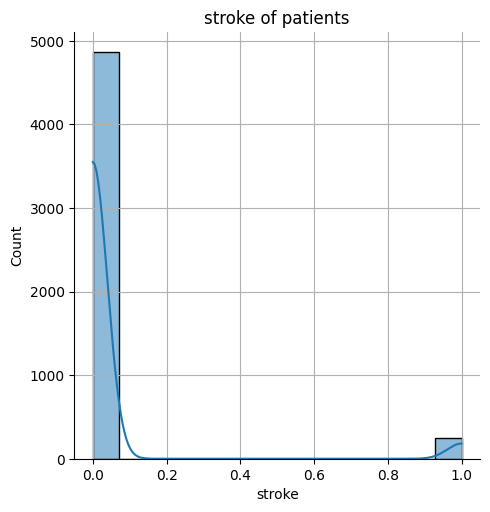

In [ ]:
sns.displot(x='stroke',kde=True,data=data)
plt.title("stroke of patients")
plt.grid(True)
plt.show()


# Exploratory data analysis

In [ ]:
data.shape

(5110, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Lets fill Null Values

In [ ]:
data['bmi'].value_counts()

bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: count, Length: 418, dtype: int64

In [ ]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [ ]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data.drop('id',axis=1,inplace=True)

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
#Changing Category to Numerical Values

In [ ]:
print("Unique 'gender': {}".format(data['gender'].unique()))
print("Unique 'ever_married': {}".format(data['ever_married'].unique()))
print("Unique 'work_type': {}".format(data['work_type'].unique()))
print("Unique 'Residence_type': {}".format(data['Residence_type'].unique()))
print("Unique 'smoking_status': {}".format(data['smoking_status'].unique()))

Unique 'gender': ['Male' 'Female' 'Other']
Unique 'ever_married': ['Yes' 'No']
Unique 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique 'Residence_type': ['Urban' 'Rural']
Unique 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
# create encoder for each categorical variable
label_gender = LabelEncoder()
label_married = LabelEncoder()
label_work = LabelEncoder()
label_residence = LabelEncoder()
label_smoking = LabelEncoder()

In [ ]:
data['gender'] = label_gender.fit_transform(data['gender'])
data['ever_married'] = label_married.fit_transform(data['ever_married'])
data['work_type']= label_work.fit_transform(data['work_type'])
data['Residence_type']= label_residence.fit_transform(data['Residence_type'])
data['smoking_status']= label_smoking.fit_transform(data['smoking_status'])
with pd.option_context('expand_frame_repr', False):
    print(data.head())

   gender   age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level        bmi  smoking_status  stroke
0       1  67.0             0              1             1          2               1             228.69  36.600000               1       1
1       0  61.0             0              0             1          3               0             202.21  28.893237               2       1
2       1  80.0             0              1             1          2               0             105.92  32.500000               2       1
3       0  49.0             0              0             1          2               1             171.23  34.400000               3       1
4       0  79.0             1              0             1          3               0             174.12  24.000000               2       1


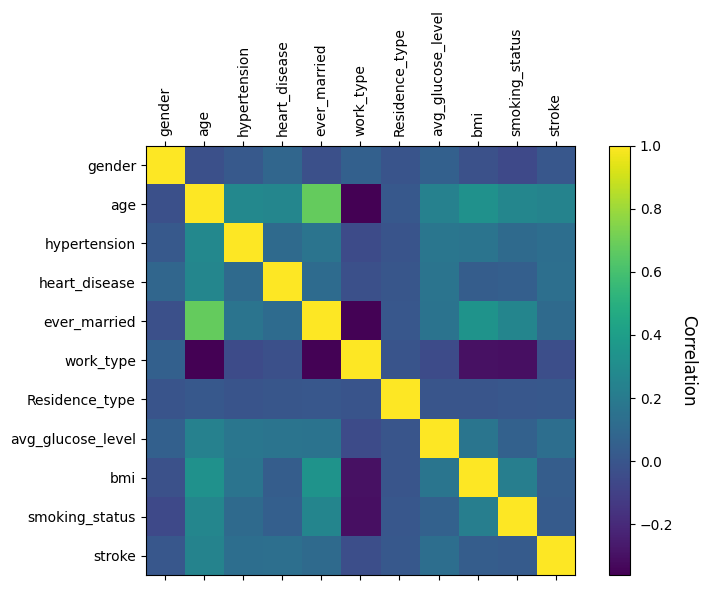

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
im = ax.matshow(data.corr())
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[1]))
ax.set_xticklabels(data.columns,rotation=90)
ax.set_yticklabels(data.columns)
# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=12)
fig.tight_layout()
plt.show()

In [ ]:
#Histogram of Features

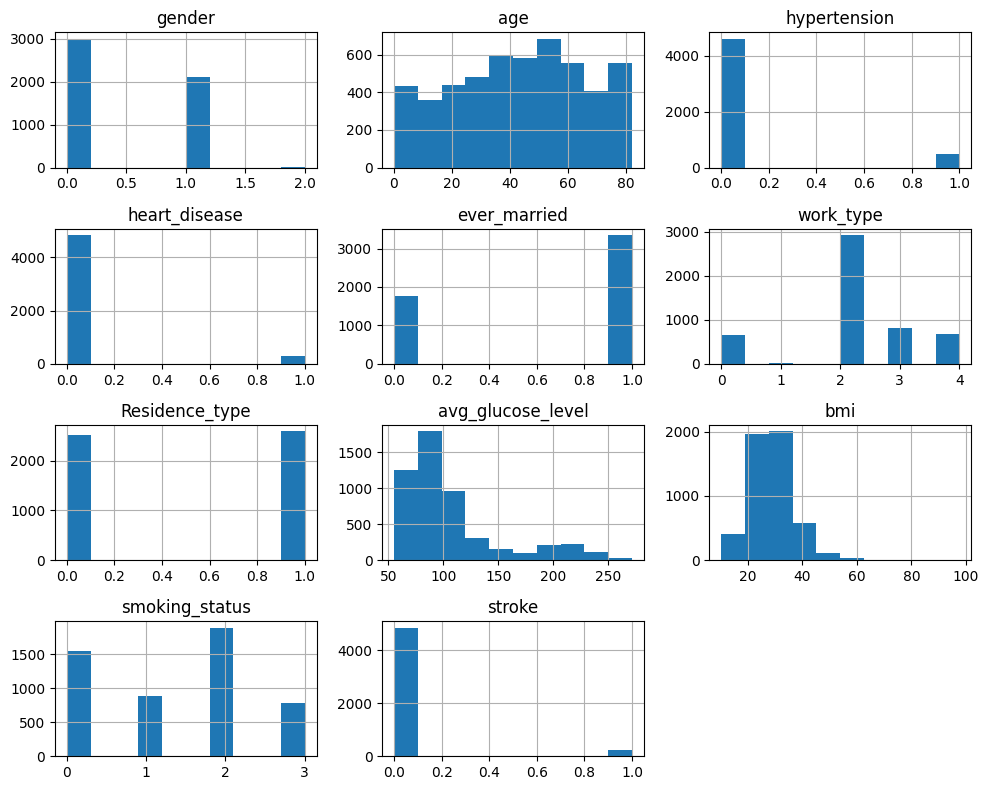

In [ ]:
fig = data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

In [ ]:
#Class (Target) Distribution
#Now, let's take a look at the distribution of class (target). If the class is highly imbalanced, we have to solve this issue so that our model will not be biased towards the majority class

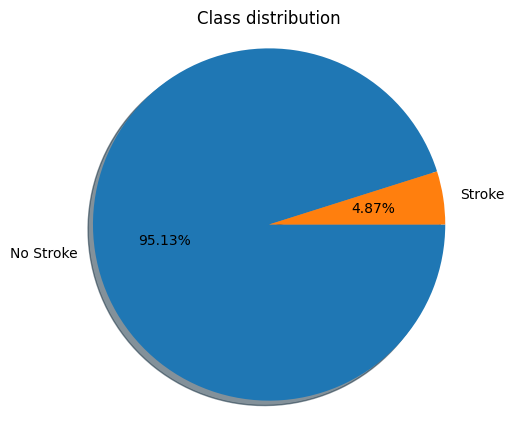

# samples associated with no stroke: 4861
# samples associated with stroke: 249


In [ ]:
class_occur = data['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_occur[0]))
print("# samples associated with stroke: {}".format(class_occur[1]))

In [ ]:
#data spilting

# Outlier Removation

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

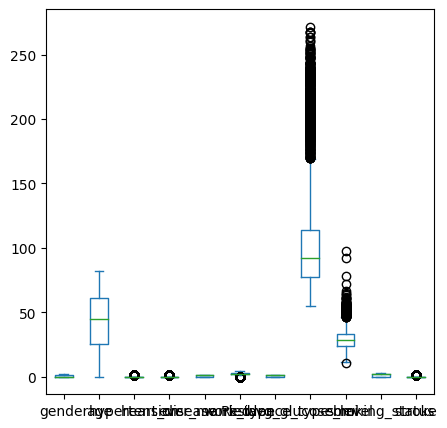

In [ ]:
data.plot(kind='box')
plt.show()

# Label Encoding

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [ ]:
gender=enc.fit_transform(data['gender'])

In [ ]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [ ]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [ ]:
data['work_type']=work_type

In [ ]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [ ]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


# Splitting the data for train and test

X ---train_X,test_X  80/20                   
Y ---train_Y,test_Y

In [ ]:
X=data.drop('stroke',axis=1)

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [ ]:
Y=data['stroke']

In [ ]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2285,1,49.0,0,0,1,2,0,79.64,28.893237,3
4733,1,67.0,0,0,1,2,0,83.16,25.500000,1
3905,1,78.0,0,0,1,2,1,208.85,24.400000,1
4700,1,47.0,0,0,1,2,0,110.14,30.500000,3
4939,0,59.0,0,0,1,2,1,71.08,28.100000,2
...,...,...,...,...,...,...,...,...,...,...
1180,0,62.0,0,0,1,2,0,82.57,36.000000,1
3441,0,59.0,0,0,1,3,1,90.06,28.900000,3
1344,1,47.0,0,0,1,2,0,86.37,39.200000,3
4623,1,25.0,0,0,1,0,1,166.38,23.100000,2


In [ ]:
Y_train

2285    0
4733    0
3905    0
4700    0
4939    0
       ..
1180    0
3441    0
1344    0
4623    0
1289    0
Name: stroke, Length: 4088, dtype: int64

In [ ]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2413,0,58.00,0,0,1,2,0,100.42,39.500000,3
1141,1,57.00,0,0,1,2,0,90.06,29.800000,0
146,1,65.00,0,0,1,3,1,68.43,28.893237,1
3883,0,1.64,0,0,0,4,1,69.89,18.100000,0
1044,0,79.00,0,0,1,0,1,93.89,30.400000,2
...,...,...,...,...,...,...,...,...,...,...
2261,1,59.00,0,0,1,2,1,60.35,25.900000,1
4712,1,57.00,0,0,1,2,1,93.04,29.200000,2
4971,0,63.00,0,0,1,2,1,57.06,37.900000,2
2224,1,57.00,0,0,1,2,0,76.28,31.400000,1


In [ ]:
Y_test

2413    0
1141    0
146     1
3883    0
1044    0
       ..
2261    0
4712    0
4971    0
2224    0
4825    0
Name: stroke, Length: 1022, dtype: int64

# Normalize

In [ ]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [ ]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# lets save the scaler object

In [ ]:
import pickle
import os


In [ ]:
scaler_path=os.path.join(r"C:\Users\hp\Desktop\brain stroke\healthcare-dataset-stroke-data.csv")
with open(scaler_path,'wb') as scaler_file:pickle.dump(std,scaler_file)

In [ ]:
X_train_std

array([[ 1.19359699,  0.2521852 , -0.33069968, ..., -0.58626884,
         0.00238781,  1.51158251],
       [ 1.19359699,  1.04686385, -0.33069968, ..., -0.50843521,
        -0.44065504, -0.35191245],
       [ 1.19359699,  1.5325008 , -0.33069968, ...,  2.27080023,
        -0.58427812, -0.35191245],
       ...,
       [ 1.19359699,  0.16388757, -0.33069968, ..., -0.43745625,
         1.34810513,  1.51158251],
       [ 1.19359699, -0.80738634, -0.33069968, ...,  1.33171097,
        -0.75401449,  0.57983503],
       [-0.83780372,  1.62079843, -0.33069968, ..., -0.74171498,
        -0.16646553,  0.57983503]])

In [ ]:
X_test_std

array([[-0.83780372,  0.64952452, -0.33069968, ..., -0.12678509,
         1.38727506,  1.51158251],
       [ 1.19359699,  0.60537571, -0.33069968, ..., -0.35586361,
         0.12078063, -1.28365994],
       [ 1.19359699,  0.95856622, -0.33069968, ..., -0.83414241,
         0.00238781, -0.35191245],
       ...,
       [-0.83780372,  0.87026859, -0.33069968, ..., -1.08555387,
         1.17836876,  0.57983503],
       [ 1.19359699,  0.60537571, -0.33069968, ..., -0.66056457,
         0.32968693, -0.35191245],
       [-0.83780372, -1.29302329, -0.33069968, ..., -0.75962556,
        -1.31545016, -1.28365994]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

In [ ]:
model1 = LogisticRegression(solver='lbfgs', max_iter=10000)
model1.fit(X_train, Y_train)
X_train_prediction1 = model1.predict(X_train)
X_test_prediction1 = model1.predict(X_test)
training_data_accuracy1 = accuracy_score(X_train_prediction1, Y_train)
testing_data_accuracy1 = accuracy_score(X_test_prediction1, Y_test)
print('accuracy on training data: ', training_data_accuracy1)
print('accuracy on testing data: ', testing_data_accuracy1)


accuracy on training data:  0.9522994129158513
accuracy on testing data:  0.9471624266144814


Text(0.5, 1.0, 'classification accuracy on Train & test')

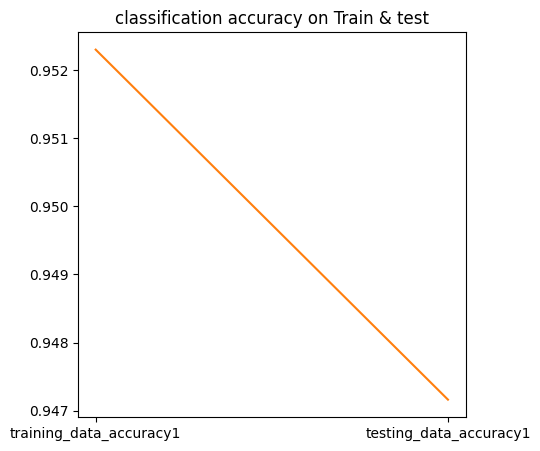

In [ ]:
plt.plot(training_data_accuracy1,testing_data_accuracy1)
x=["training_data_accuracy1","testing_data_accuracy1"]
h=[ training_data_accuracy1, testing_data_accuracy1]
plt.plot(x,h)
plt.title("classification accuracy on Train & test")

Text(0.5, 1.0, 'classification accuracy on Train & test')

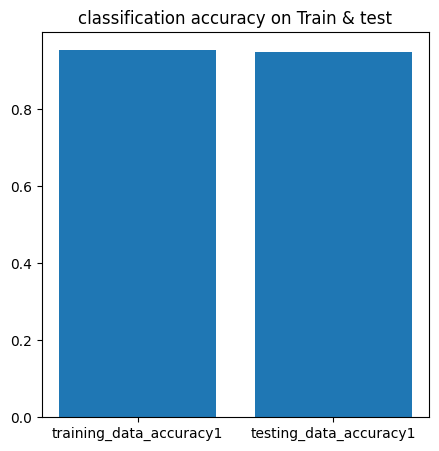

In [ ]:
plt.plot(training_data_accuracy1,testing_data_accuracy1)
x=["training_data_accuracy1","testing_data_accuracy1"]
h=[ training_data_accuracy1, testing_data_accuracy1]
plt.bar(x,h)
plt.title("classification accuracy on Train & test")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(X_train, Y_train)
X_train_prediction2 = model2.predict(X_train)
X_test_prediction2 = model2.predict(X_test)
training_data_accuracy2 = accuracy_score(X_train_prediction2, Y_train)
testing_data_accuracy2 = accuracy_score(X_test_prediction2, Y_test)
print('accuracy on training data: ', training_data_accuracy2)
print('accuracy on testing data: ', testing_data_accuracy2)

accuracy on training data:  0.9527886497064579
accuracy on testing data:  0.9422700587084148


Text(0.5, 1.0, 'classification accuracy on Train & test')

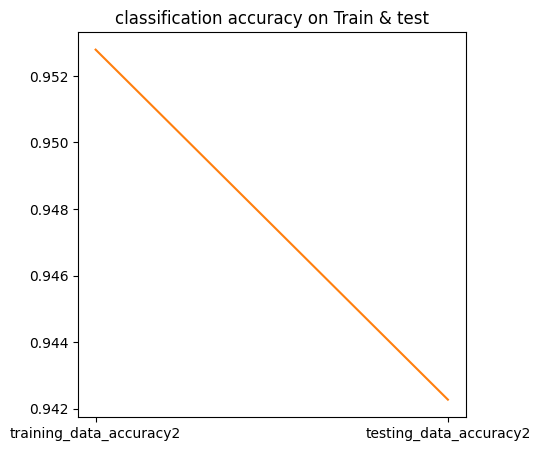

In [ ]:
plt.plot(training_data_accuracy2,testing_data_accuracy2)
x=["training_data_accuracy2","testing_data_accuracy2"]
h=[ training_data_accuracy2, testing_data_accuracy2]
plt.plot(x,h)
plt.title("classification accuracy on Train & test")

Text(0.5, 1.0, 'classification accuracy on Train & test')

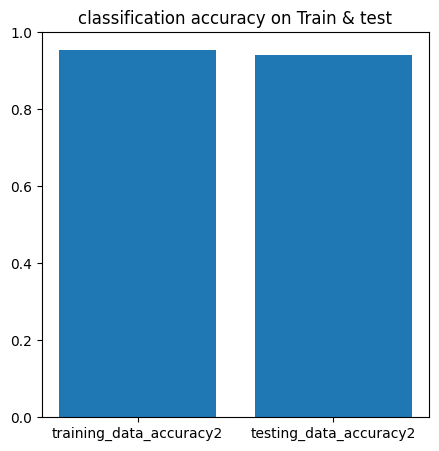

In [ ]:
plt.plot(training_data_accuracy2,testing_data_accuracy2)
x=["training_data_accuracy2","testing_data_accuracy2"]
h=[ training_data_accuracy2, testing_data_accuracy2]
plt.bar(x,h)
plt.title("classification accuracy on Train & test")

In [ ]:
model3 = SVC(random_state=None)
model3.fit(X_train, Y_train)
X_train_prediction3 = model3.predict(X_train)
X_test_prediction3 = model3.predict(X_test)
training_data_accuracy3 = accuracy_score(X_train_prediction3, Y_train)
testing_data_accuracy3 = accuracy_score(X_test_prediction3, Y_test)
print('accuracy on training data: ', training_data_accuracy3)
print('accuracy on testing data: ', testing_data_accuracy3)

accuracy on training data:  0.9522994129158513
accuracy on testing data:  0.9471624266144814


Text(0.5, 1.0, 'classification accuracy on Train & test')

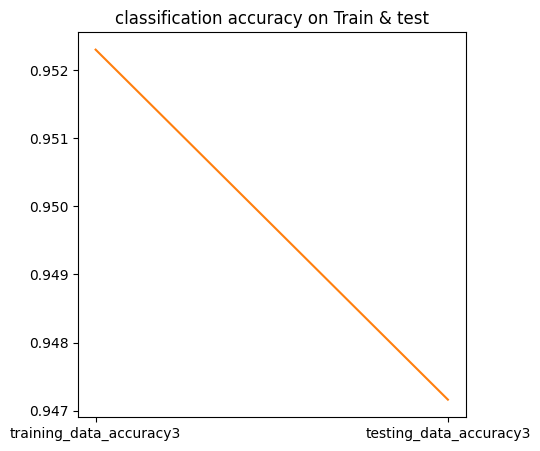

In [ ]:
plt.plot(training_data_accuracy3,testing_data_accuracy3)
x=["training_data_accuracy3","testing_data_accuracy3"]
h=[ training_data_accuracy3, testing_data_accuracy3]
plt.plot(x,h)
plt.title("classification accuracy on Train & test")

Text(0.5, 1.0, 'classification accuracy on Train & test')

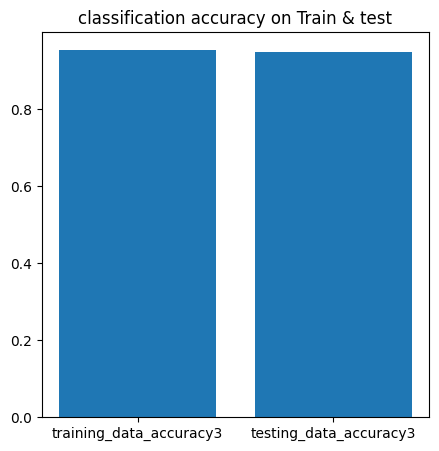

In [ ]:
plt.plot(training_data_accuracy3,testing_data_accuracy3)
x=["training_data_accuracy3","testing_data_accuracy3"]
h=[ training_data_accuracy3, testing_data_accuracy3]
plt.bar(x,h)
plt.title("classification accuracy on Train & test")

In [ ]:
model4 = GaussianNB()
model4.fit(X_train, Y_train)
X_train_prediction4 = model4.predict(X_train)
X_test_prediction4 = model4.predict(X_test)
training_data_accuracy4 = accuracy_score(X_train_prediction4, Y_train)
testing_data_accuracy4 = accuracy_score(X_test_prediction4, Y_test)
print('accuracy on training data: ', training_data_accuracy4)
print('accuracy on testing data: ', testing_data_accuracy4)

accuracy on training data:  0.8713307240704501
accuracy on testing data:  0.8825831702544031


Text(0.5, 1.0, 'classification accuracy on Train & test')

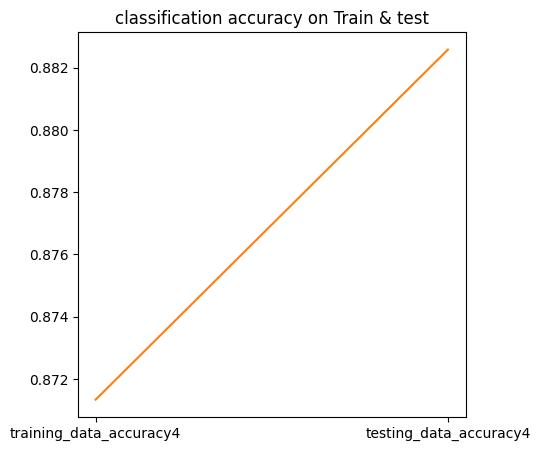

In [ ]:
plt.plot(training_data_accuracy4,testing_data_accuracy4)
x=["training_data_accuracy4","testing_data_accuracy4"]
h=[ training_data_accuracy4, testing_data_accuracy4]
plt.plot(x,h)
plt.title("classification accuracy on Train & test")

Text(0.5, 1.0, 'classification accuracy on Train & test')

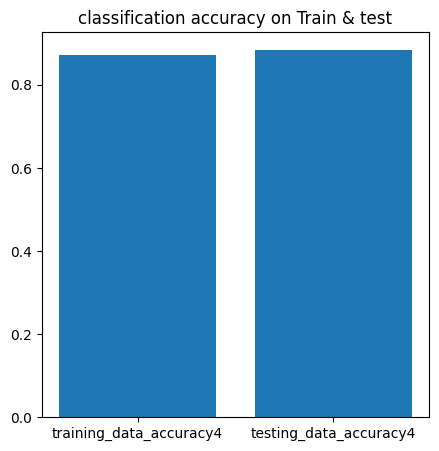

In [ ]:
plt.plot(training_data_accuracy4,testing_data_accuracy4)
x=["training_data_accuracy4","testing_data_accuracy4"]
h=[ training_data_accuracy4, testing_data_accuracy4]
plt.bar(x,h)
plt.title("classification accuracy on Train & test")

In [ ]:
model5 = RandomForestClassifier(random_state=None)
model5.fit(X_train, Y_train)
X_train_prediction5 = model5.predict(X_train)
X_test_prediction5 = model5.predict(X_test)
training_data_accuracy5 = accuracy_score(X_train_prediction5, Y_train)
testing_data_accuracy5 = accuracy_score(X_test_prediction5, Y_test)
print('accuracy on training data: ', training_data_accuracy5)
print('accuracy on testing data: ', testing_data_accuracy5)

accuracy on training data:  0.9997553816046967
accuracy on testing data:  0.9481409001956947


Text(0.5, 1.0, 'classification accuracy on Train & test')

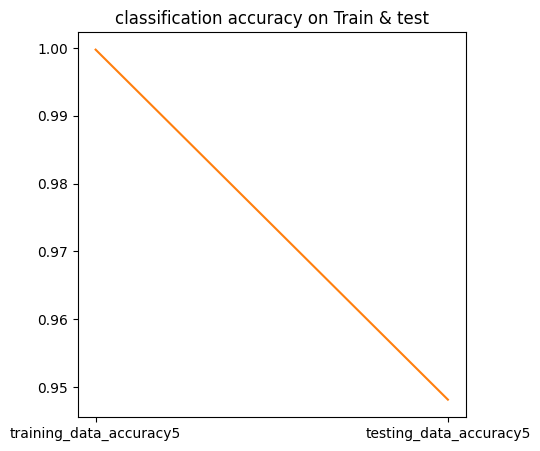

In [ ]:
plt.plot(training_data_accuracy5,testing_data_accuracy5)
x=["training_data_accuracy5","testing_data_accuracy5"]
h=[ training_data_accuracy5, testing_data_accuracy5]
plt.plot(x,h)
plt.title("classification accuracy on Train & test")

Text(0.5, 1.0, 'classification accuracy on Train & test')

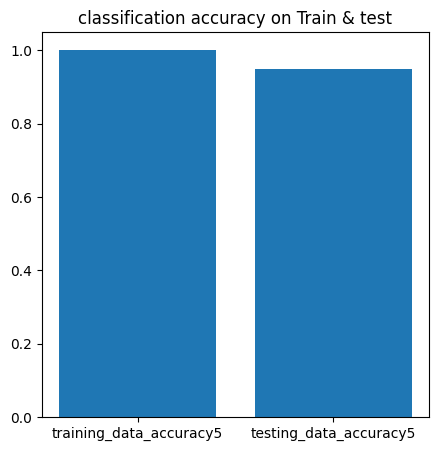

In [ ]:
plt.plot(training_data_accuracy5,testing_data_accuracy5)
x=["training_data_accuracy5","testing_data_accuracy5"]
h=[ training_data_accuracy5, testing_data_accuracy5]
plt.bar(x,h)
plt.title("classification accuracy on Train & test")

In [ ]:
from sklearn import tree

In [ ]:
print("------------****Using decision tree Algorithm****---------")
c = tree.DecisionTreeClassifier()
c.fit(X_train, Y_train)
accu_train6 = np.sum(c.predict(X_train) == Y_train) / float(Y_train.size)
accu_test6 = np.sum(c.predict(X_test) == Y_test) / float(Y_test.size)
print('classification accuracy on train', (accu_train6) * 100)
print('classification accuracy on test', (accu_test6) * 100)

------------****Using decision tree Algorithm****---------
classification accuracy on train 100.0
classification accuracy on test 91.97651663405088


Text(0.5, 1.0, 'classification accuracy on Train & test')

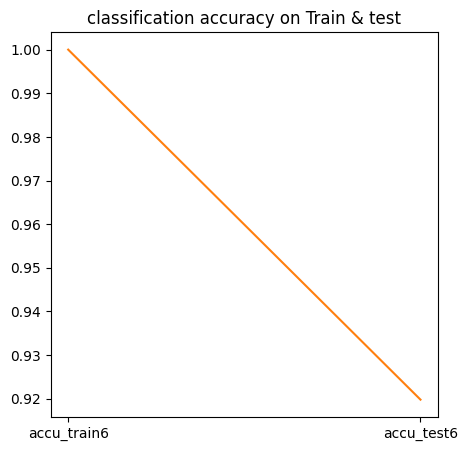

In [ ]:
plt.plot(accu_train6,accu_test6)
x=["accu_train6","accu_test6"]
h=[ accu_train6,accu_test6]
plt.plot(x,h)
plt.title("classification accuracy on Train & test")

Text(0.5, 1.0, 'classification accuracy on Train & test')

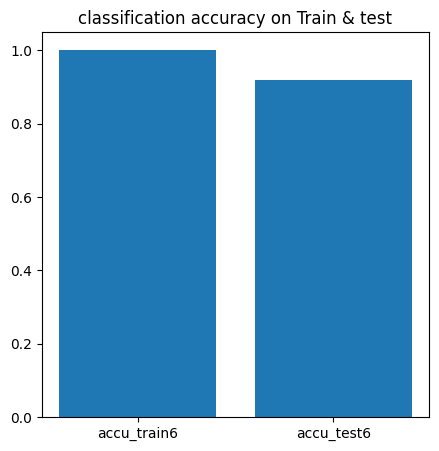

In [ ]:
plt.plot(accu_train6,accu_test6)
x=["accu_train6","accu_test6"]
h=[ accu_train6,accu_test6]
plt.bar(x,h)
plt.title("classification accuracy on Train & test")

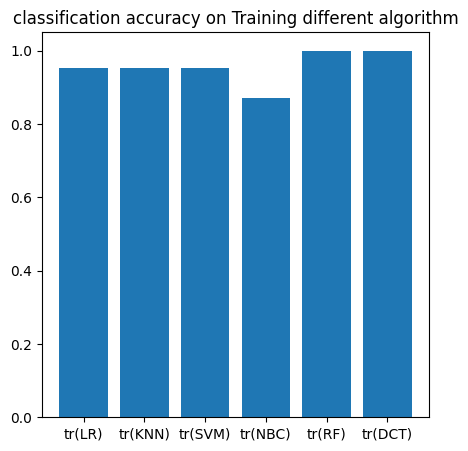

In [ ]:
import matplotlib.pyplot as plt
x=["tr(LR)","tr(KNN)","tr(SVM)","tr(NBC)","tr(RF)","tr(DCT)"]
h=[training_data_accuracy1,training_data_accuracy2,training_data_accuracy3,training_data_accuracy4,training_data_accuracy5,accu_train6 ]
plt.bar(x,h)


plt.title("classification accuracy on Training different algorithm")
plt.show()

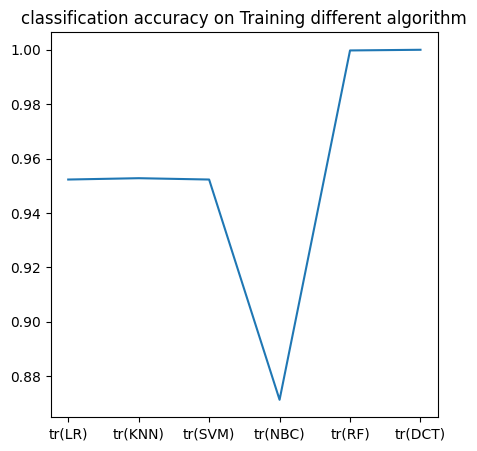

In [ ]:
import matplotlib.pyplot as plt
x=["tr(LR)","tr(KNN)","tr(SVM)","tr(NBC)","tr(RF)","tr(DCT)"]
h=[training_data_accuracy1,training_data_accuracy2,training_data_accuracy3,training_data_accuracy4,training_data_accuracy5,accu_train6 ]
plt.plot(x,h)


plt.title("classification accuracy on Training different algorithm")
plt.show()

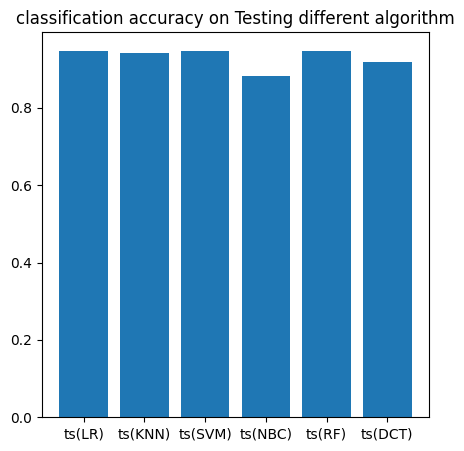

In [ ]:
import matplotlib.pyplot as plt
x=["ts(LR)","ts(KNN)","ts(SVM)","ts(NBC)","ts(RF)","ts(DCT)"]
h=[testing_data_accuracy1,testing_data_accuracy2,testing_data_accuracy3,testing_data_accuracy4,testing_data_accuracy5,accu_test6 ]
plt.bar(x,h)


plt.title("classification accuracy on Testing different algorithm")
plt.show()

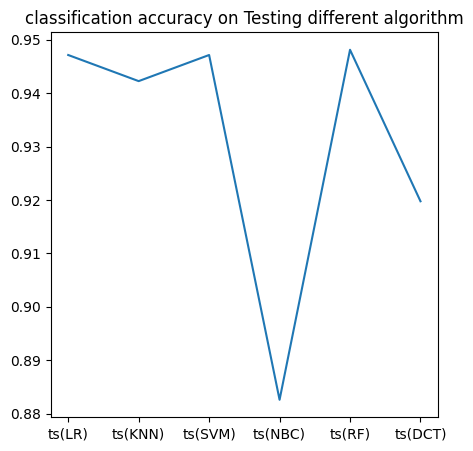

In [ ]:
import matplotlib.pyplot as plt
x=["ts(LR)","ts(KNN)","ts(SVM)","ts(NBC)","ts(RF)","ts(DCT)"]
h=[testing_data_accuracy1,testing_data_accuracy2,testing_data_accuracy3,testing_data_accuracy4,testing_data_accuracy5,accu_test6 ]
plt.plot(x,h)


plt.title("classification accuracy on Testing different algorithm")
plt.show()

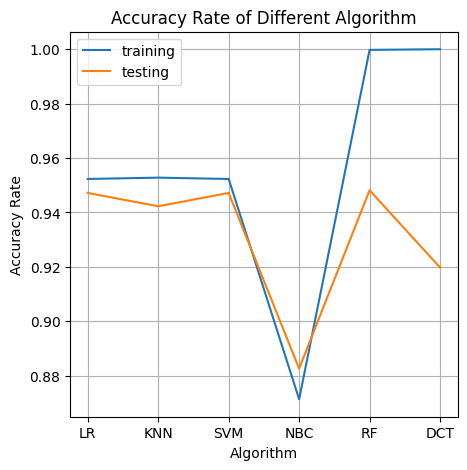

In [ ]:
m=[training_data_accuracy1,training_data_accuracy2,training_data_accuracy3,training_data_accuracy4,training_data_accuracy5,accu_train6 ]
n=[testing_data_accuracy1,testing_data_accuracy2,testing_data_accuracy3,testing_data_accuracy4,testing_data_accuracy5,accu_test6]
lebel=['LR','KNN','SVM','NBC','RF','DCT']
plt.plot(lebel,m,label='training')
plt.plot(lebel,n,label='testing')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rate of Different Algorithm')
plt.legend()
plt.grid(True)
plt.show()